# **ANÁLISIS ITERATIVO DE LAS CATEGORÍAS IDEOLÓGICAS EN WIKIPEDIA**
#### Ramón Zamora, carné 10233

## INTRODUCCIÓN
El presente proyecto utiliza herramientas de análisis de texto computacional para llevar a cabo un exploración de los datos de los artículos vinculados a las categorías de distintas ideologías que se pueden encontrar en la enciclopedia digial Wikipedia. Para llevar a cabo este ejercicio se utilizarán las librerías de ...

In [1]:
import wikipediaapi
import pickle
from pprint import pprint
import pandas as pd
pd.set_option("display.notebook_repr_html", False)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dcss.text import bigram_process, preprocess, bow_to_df
from dcss.plotting import format_axes_commas, custom_seaborn
from dcss.utils import sparse_groupby
custom_seaborn()
import spacy
nlp = spacy.load('en_core_web_sm')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
import scipy
from itertools import islice

In [2]:
wiki_wiki = wikipediaapi.Wikipedia('Ciencias Sociales Computacionales (ramonzamora89@gmail.com)', 'en')

In [3]:
#1. Busqueda de Anarquismo
cat_anarchism = wiki_wiki.page("Category:Anarchism")
print("Anarchism exist: %s" % cat_anarchism.exists())
# 2. Busqueda de Autoritarismo
cat_authoritarianism = wiki_wiki.page("Category:Authoritarianism")
print("Authoritarianism exist: %s" % cat_authoritarianism.exists())
# 3. Busqueda de Pensamiento comunitario
cat_communitarianism = wiki_wiki.page("Category:Communitarianism")
print("Communitarianism exist: %s" % cat_communitarianism.exists())
# 4. Busqueda de Comunismo
cat_communism = wiki_wiki.page("Category:Communism")
print("Communism exist: %s" % cat_communism.exists())
# 5. Busqueda de Conservadurismo
cat_conservatism = wiki_wiki.page("Category:Conservatism")
print("Conservatism exist: %s" % cat_conservatism.exists())
# 6. Busqueda de Corporativismo
cat_corporatism = wiki_wiki.page("Category:Corporatism")
print("Corporatism exist: %s" % cat_corporatism.exists())
# 7. Busqueda de Ambiantalismo
cat_environmentalism = wiki_wiki.page("Category:Environmentalism")
print("Environmentalism exist: %s" % cat_environmentalism.exists())
# 8. Busqueda de Facismo
cat_fascism = wiki_wiki.page("Category:Fascism")
print("Fascism exist: %s" % cat_fascism.exists())
# 9. Fascism de Liberalismo
cat_liberalism = wiki_wiki.page("Category:Liberalism")
print("Liberalism exist: %s" % cat_liberalism.exists())
# 10. Busqueda de Libterarismo
cat_libertarianism = wiki_wiki.page("Category:Libertarianism")
print("Libertarianism exist: %s" % cat_libertarianism.exists())
# 11. Busqueda de Nacionalismo
cat_nationalism = wiki_wiki.page("Category:Nationalism")
print("Nationalism exist: %s" % cat_nationalism.exists())
# 12. Busqueda de Populismo
cat_populism = wiki_wiki.page("Category:Populism")
print("Populism exist: %s" % cat_populism.exists())

Anarchism exist: True
Authoritarianism exist: True
Communitarianism exist: True


Communism exist: True
Conservatism exist: True
Corporatism exist: True
Environmentalism exist: True
Fascism exist: True
Liberalism exist: True
Libertarianism exist: True
Nationalism exist: True
Populism exist: True


In [4]:
data = []
pages_names = cat_anarchism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_anarchism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary': page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_authoritarianism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_authoritarianism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_communitarianism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_communitarianism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_communism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_communism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_conservatism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_conservatism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_corporatism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_corporatism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_environmentalism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_environmentalism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_fascism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_fascism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_liberalism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_liberalism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_libertarianism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_libertarianism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_nationalism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_nationalism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_populism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_populism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )


df = pd.DataFrame(data)

In [5]:
df.to_csv('ideologías.csv')

In [6]:
columns = ['Category', 'Namespace', 'Title', 'Summary', 'Content']
wiki_df = pd.read_csv("ideologías.csv")
wiki_df.dropna(subset = ['Title', 'Summary'], inplace=True)
wiki_df =wiki_df.query('Namespace < 1')
wiki_df['Category'].value_counts()

Category:Authoritarianism (id: 36055803, ns: 14)    149
Category:Environmentalism (id: 737047, ns: 14)      124
Category:Liberalism (id: 724440, ns: 14)            108
Category:Communism (id: 722710, ns: 14)              95
Category:Nationalism (id: 846456, ns: 14)            87
Category:Conservatism (id: 780171, ns: 14)           75
Category:Corporatism (id: 21722509, ns: 14)          73
Category:Fascism (id: 889991, ns: 14)                68
Category:Populism (id: 19997168, ns: 14)             62
Category:Anarchism (id: 780754, ns: 14)              44
Category:Libertarianism (id: 1543366, ns: 14)        39
Category:Communitarianism (id: 49526307, ns: 14)     16
Name: Category, dtype: int64

In [7]:
content_keep = [
    'Category:Authoritarianism (id: 36055803, ns: 14)',
    'Category:Environmentalism (id: 737047, ns: 14)',
    'Category:Liberalism (id: 724440, ns: 14)',
    'Category:Communism (id: 722710, ns: 14)',
    'Category:Nationalism (id: 846456, ns: 14)',
    'Category:Conservatism (id: 780171, ns: 14)',
    'Category:Corporatism (id: 21722509, ns: 14)',
    'Category:Fascism (id: 889991, ns: 14)',
    'Category:Populism (id: 19997168, ns: 14)',
    'Category:Anarchism (id: 780754, ns: 14)',
    'Category:Libertarianism (id: 1543366, ns: 14)',
    'Category:Communitarianism (id: 49526307, ns: 14)'
]
content_subset = wiki_df[wiki_df['Category'].isin(content_keep)].copy()
content_subset.reset_index(drop=True, inplace=True)
total_content_counts = content_subset['Category'].value_counts()
total_content_counts

Category:Authoritarianism (id: 36055803, ns: 14)    149
Category:Environmentalism (id: 737047, ns: 14)      124
Category:Liberalism (id: 724440, ns: 14)            108
Category:Communism (id: 722710, ns: 14)              95
Category:Nationalism (id: 846456, ns: 14)            87
Category:Conservatism (id: 780171, ns: 14)           75
Category:Corporatism (id: 21722509, ns: 14)          73
Category:Fascism (id: 889991, ns: 14)                68
Category:Populism (id: 19997168, ns: 14)             62
Category:Anarchism (id: 780754, ns: 14)              44
Category:Libertarianism (id: 1543366, ns: 14)        39
Category:Communitarianism (id: 49526307, ns: 14)     16
Name: Category, dtype: int64

In [8]:
sampled_contents = content_subset.groupby('Category').sample(replace=False, frac=.3, random_state=23)
len(sampled_contents)

281

In [9]:
with open('sampled_wiki_ideologias_content.pkl', 'wb') as fp:
    pickle.dump(sampled_contents, fp)
sampled_contents_counts = sampled_contents['Category'].value_counts()
sample_sizes = pd.DataFrame(zip(total_content_counts, sampled_contents_counts), columns=['Total', 'Sample'], index=content_keep)

In [10]:
sampled_contents['content_len'] = sampled_contents['Content'].apply(lambda x: len(x.split()))

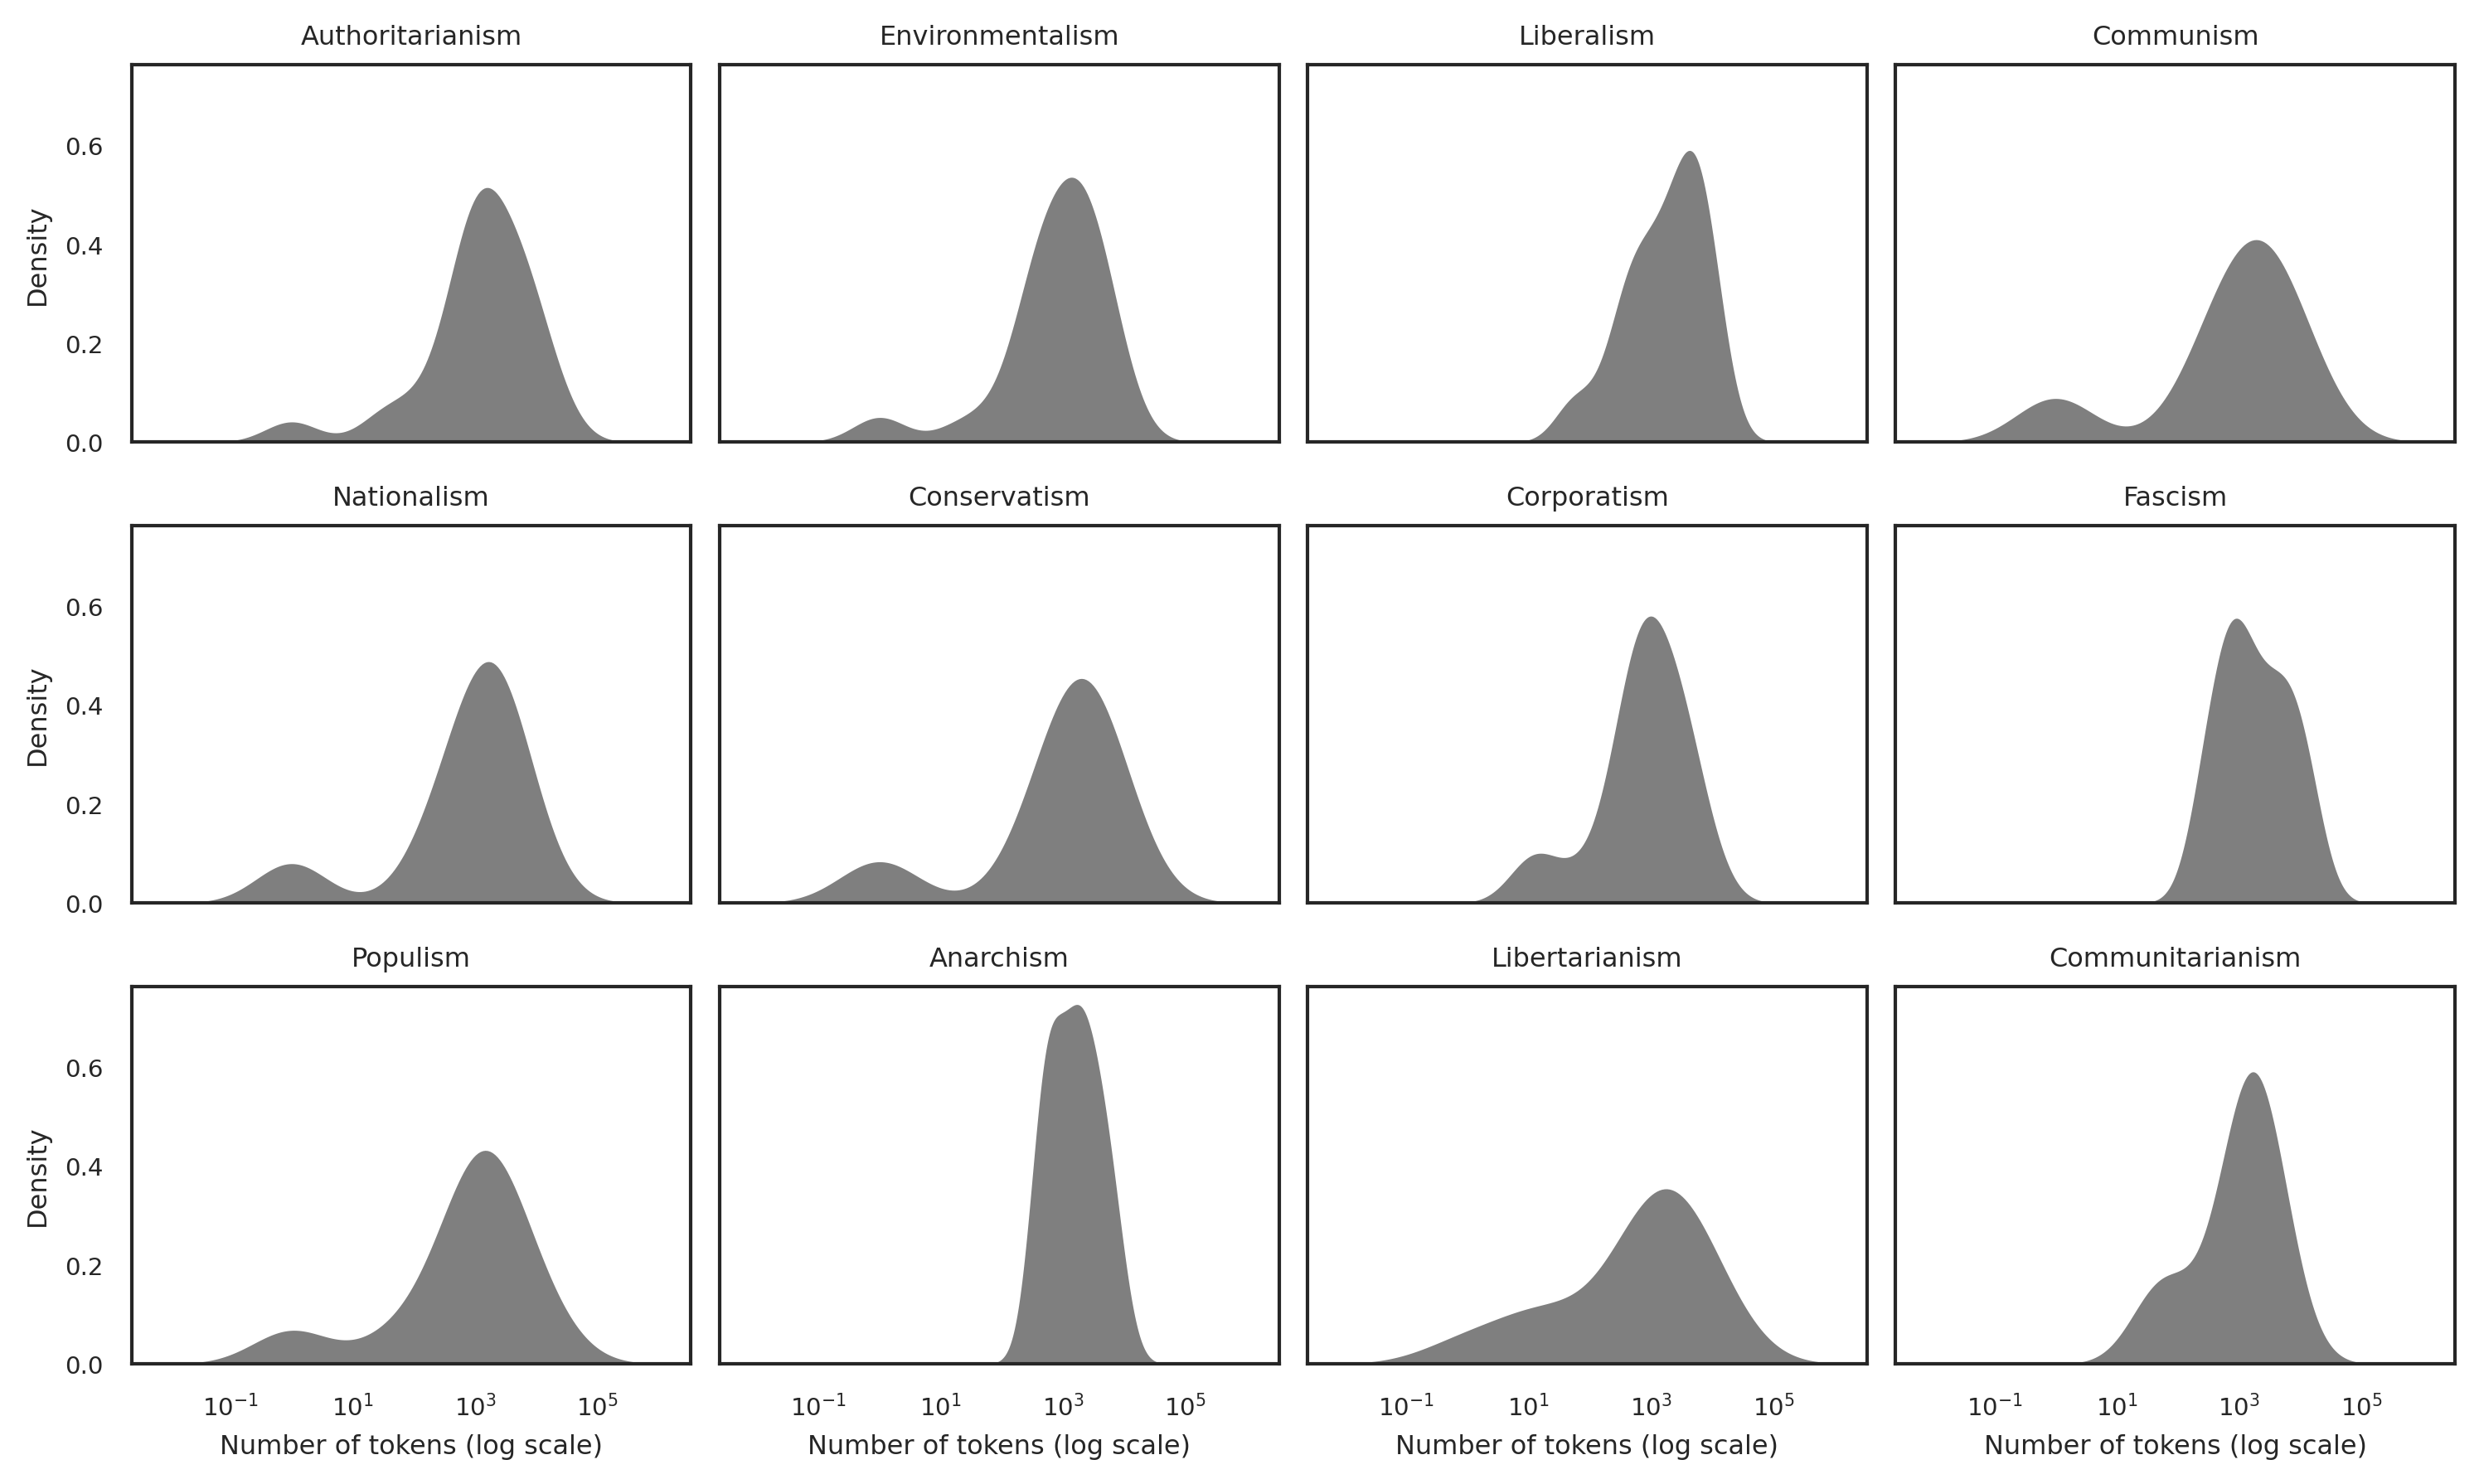

In [11]:
categories = sampled_contents.groupby('Category')
def categoria_subplot(subgroup, title, position):
    sns.kdeplot(ax = position, data=subgroup, x='content_len', log_scale=True, fill=True, alpha=.5, linewidth=0, color='black') 
    position.set(xlabel='Number of tokens (log scale)', title=title)
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10, 6))

categoria_subplot(categories.get_group('Category:Authoritarianism (id: 36055803, ns: 14)'), 'Authoritarianism', ax[0,0])
categoria_subplot(categories.get_group('Category:Environmentalism (id: 737047, ns: 14)'), 'Environmentalism', ax[0,1])
categoria_subplot(categories.get_group('Category:Liberalism (id: 724440, ns: 14)'), 'Liberalism', ax[0,2])
categoria_subplot(categories.get_group('Category:Communism (id: 722710, ns: 14)'), 'Communism', ax[0,3])
categoria_subplot(categories.get_group('Category:Nationalism (id: 846456, ns: 14)'),'Nationalism', ax[1,0])
categoria_subplot(categories.get_group('Category:Conservatism (id: 780171, ns: 14)'), 'Conservatism', ax[1,1])
categoria_subplot(categories.get_group('Category:Corporatism (id: 21722509, ns: 14)'), 'Corporatism', ax[1,2])
categoria_subplot(categories.get_group('Category:Fascism (id: 889991, ns: 14)'), 'Fascism', ax[1,3])
categoria_subplot(categories.get_group('Category:Populism (id: 19997168, ns: 14)'),'Populism', ax[2,0])
categoria_subplot(categories.get_group('Category:Anarchism (id: 780754, ns: 14)'), 'Anarchism', ax[2,1])
categoria_subplot(categories.get_group('Category:Libertarianism (id: 1543366, ns: 14)'), 'Libertarianism', ax[2,2])
categoria_subplot(categories.get_group('Category:Communitarianism (id: 49526307, ns: 14)'), 'Communitarianism', ax[2,3])

plt.tight_layout()
plt.show()
fig.savefig("graficadensidadWiki")

In [12]:
bigram_model, preprocessed = preprocess(sampled_contents['Content'], nlp=nlp, bigrams= True, detokenize = True, n_process=4)

In [ ]:
len(preprocessed)

281

In [ ]:
with open('processed_sample_contents.pkl', 'wb') as fp:
    pickle.dump(preprocessed, fp)

with open('sample_contents_bigram_model.pkl', 'wb') as fp:
    pickle.dump(bigram_model, fp)

with open('processed_sample_contents.pkl', 'rb') as fp:
    preprocessed = pickle.load(fp)

In [ ]:
sampled_contents.iloc[90]['Content']

'[Section: Early life (1):\nJohn Mbiti was born on 30 November 1931 in Mulango, Kitui County, eastern Kenya. His parents were two farmers, Samuel Mutuvi Ngaangi and Valesi Mbandi Kiimba; He was one of six children and was raised in a strong Christian environment. His Christian upbringing encouraged his educational journey through the African Inland Church. He attended Alliance High School in Nairobi and continued his education at University College of Makerere where he graduated in 1953. Mbiti furthered his academic education in the US and received his Bachelor of Arts degree in 1956 and a Bachelor of Theology degree in 1957 from Barrington College, a Christian liberal arts school in Rhode Island. He then earned his Doctor of Philosophy in theology at the University of Cambridge, from where he graduated in 1963. Supervised by C.F.D. Moule, his doctoral work sought to answer the question, "How can African societies be effectively evangelized so that the Christian faith can penetrate dee

In [ ]:
sampled_contents['preprocessed'] = preprocessed

In [ ]:
sampled_contents.iloc[90]['preprocessed']

'section early life john mbiti november mulango_kitui county eastern kenya parent farmer samuel mutuvi_ngaangi valesi_mbandi child strong christian environment christian upbringing educational journey african inland church alliance high school nairobi education university college makerere mbiti academic education bachelor art degree bachelor theology degree barrington college christian liberal art school rhode_island doctor philosophy theology university cambridge moule doctoral work question society christian faith african soil subsections_section life death mbiti religion theology makerere university uganda director world council churches ecumenical institute bogis_bossey switzerland visiting_professorship university world philosophy theology african oral tradition mbiti seminal book african religion philosophy work christian assumption traditional african religious idea demonic christian sympathetic treatment traditional religion massive field work mbiti clear interpretation religio

In [ ]:
count_vectorizer = CountVectorizer(max_df=.1, min_df=3, strip_accents='ascii',)

In [ ]:
count_matrix = count_vectorizer.fit_transform(preprocessed)
vocabulary = count_vectorizer.get_feature_names_out()
count_matrix.shape

(281, 5403)

In [ ]:
with open('count_matrix.pkl', 'wb') as fp:
    pickle.dump(count_matrix, fp)

with open('vocabulary.pkl', 'wb') as fp:
    pickle.dump(vocabulary, fp)

In [ ]:
count_data = pd.DataFrame.sparse.from_spmatrix(count_matrix)
count_data.columns = vocabulary
count_data.index = sampled_contents['Category']
count_data.shape

(281, 5403)

In [ ]:
print('sparse szie: ' +str(count_data.memory_usage().sum()/1048576) + "MB")
print('sparse density: ' +str(count_data.sparse.density))

sparse szie: 0.5045051574707031MB
sparse density: 0.028913026439114163


In [ ]:
count_data_d = count_data.sparse.to_dense()
print('dense size:' + str(count_data_d.memory_usage().sum()/1048576) + "MB")

dense size:11.585418701171875MB


In [ ]:
category_counts = sparse_groupby(sampled_contents['Category'], count_matrix, vocabulary)
results = category_counts.div(category_counts.sum(axis=1), axis=0)
results_t = results.T 
results_t.sample(20, random_state=1006)

                     Category:Anarchism (id: 780754, ns: 14)  \
rescue                                              0.000000   
permaculture                                        0.000000   
meritocratic                                        0.000000   
file                                                0.000628   
disenfranchised                                     0.000000   
donation                                            0.000000   
resort                                              0.000000   
exclusionary                                        0.000000   
slang                                               0.000000   
import_substitution                                 0.000000   
spoil                                               0.000000   
revivalism                                          0.000000   
prerogative                                         0.000000   
album                                               0.000000   
comparative                             

In [ ]:
n_top_words = 5
top_words_per_category = {}

for category in results_t.columns:
    top = results_t[category].nlargest(n_top_words)
    top_words_per_category[category] = list(zip(top.index, top))

for k, v in top_words_per_category.items():
    print(k.upper())
    for each in v:
        print(each)
    print('\n')

CATEGORY:ANARCHISM (ID: 780754, NS: 14)
('thoreau', 0.04927809165097301)
('syndicalist', 0.027306967984934087)
('anarcho', 0.021343377275580666)
('syndicalism', 0.0160075329566855)
('anarchism', 0.01349654739485248)


CATEGORY:AUTHORITARIANISM (ID: 36055803, NS: 14)
('putin', 0.012771470878578479)
('mao', 0.00728035538005923)
('islamic', 0.006786771964461994)
('maoist', 0.006293188548864758)
('argentina', 0.005429417571569595)


CATEGORY:COMMUNISM (ID: 722710, NS: 14)
('holiday', 0.023129743404409108)
('eastern_bloc', 0.014817491868449585)
('homosexuality', 0.008432718949524154)
('axis', 0.008312251535959523)
('legislature', 0.007228044813877846)


CATEGORY:COMMUNITARIANISM (ID: 49526307, NS: 14)
('theology', 0.043941411451398134)
('del', 0.037283621837549935)
('il', 0.033288948069241014)
('theological', 0.02929427430093209)
('della', 0.023968042609853527)


CATEGORY:CONSERVATISM (ID: 780171, NS: 14)
('tory', 0.019730416096893924)
('enlightenment', 0.016409454971674155)
('hayek', 0.014

In [ ]:
diff_con_snp = results_t['Category:Authoritarianism (id: 36055803, ns: 14)'] - results_t['Category:Environmentalism (id: 737047, ns: 14)']
diff_con_snp.sort_values(ascending=False, inplace=True)
auth_not_snp = diff_con_snp.head(20)
env_not_snp = diff_con_snp.tail(20)


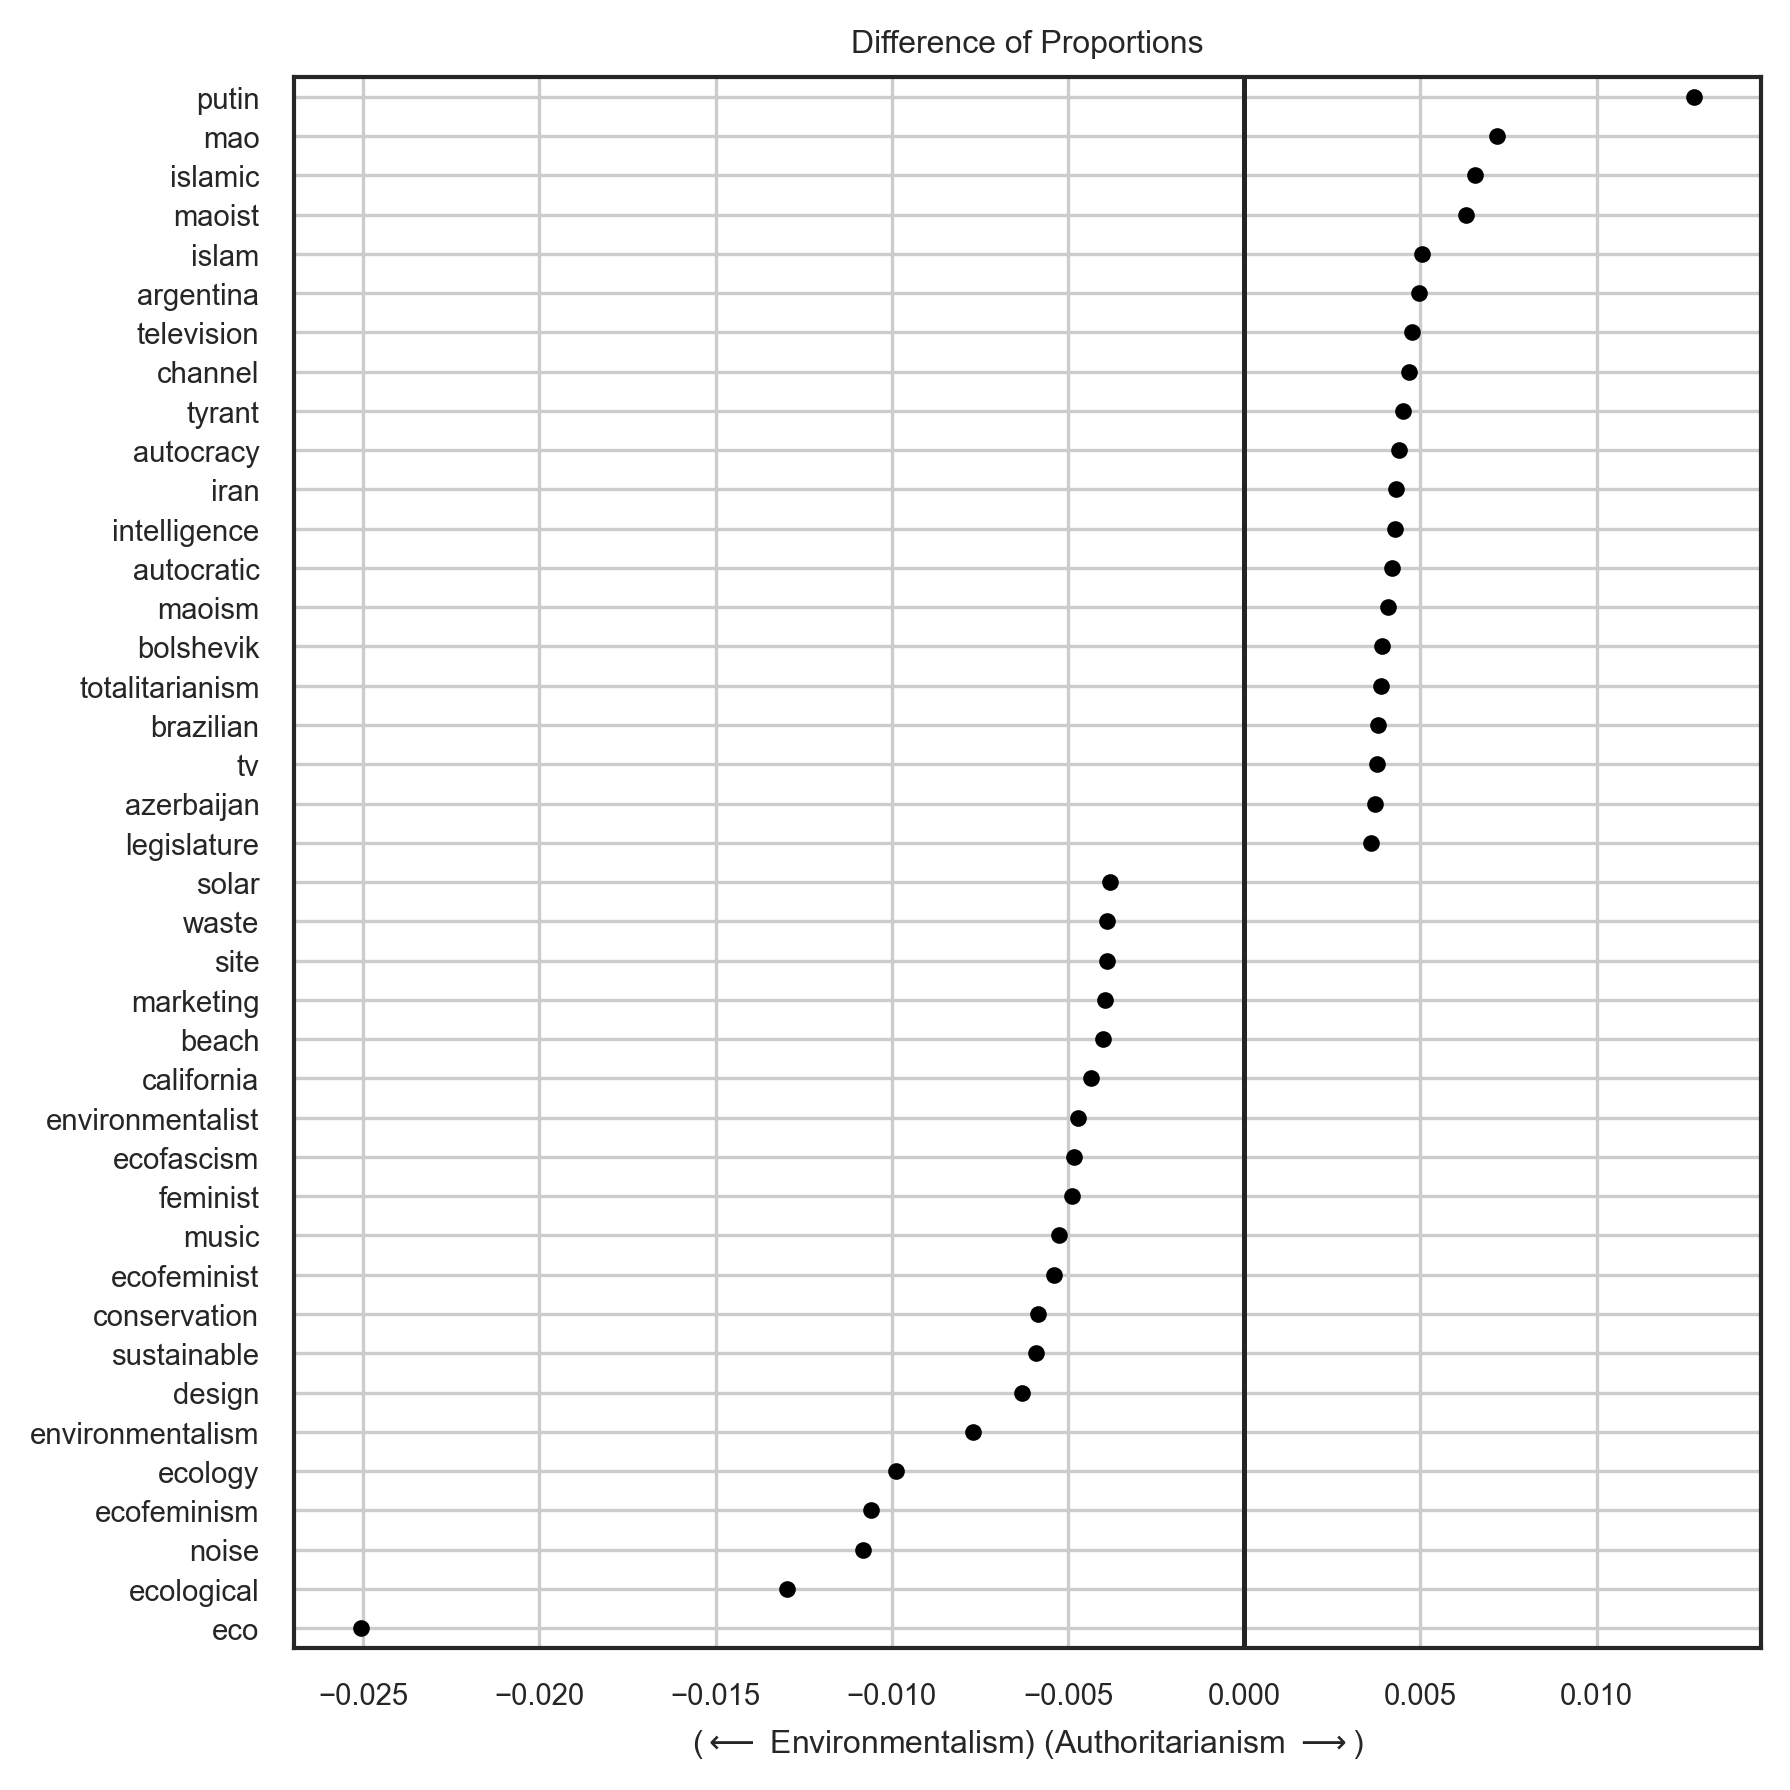

In [ ]:
dop = pd.concat([auth_not_snp, env_not_snp])
fig, ax = plt.subplots(figsize= (6,6))
sns.swarmplot(x=dop, y=dop.index, color='black', size=4)
ax.axvline(0)
plt.grid()
ax.set(xlabel=r'($\longleftarrow$ Environmentalism) (Authoritarianism $\longrightarrow$)', ylabel='', title='Difference of Proportions')
plt.tight_layout()
plt.show()
fig.savefig("tabla_comparativa.png")